In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime
%matplotlib inline

c:\users\home_041\miniconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### This notebook we're going to see the basics about returns
<h4>Look for the tickers below </h4>

<ul>
    <li>Nasdaq Composite(US)</li>
    <li>SP500(US)</li>
    <li>BOVESPA(BR)</li>
    <li>Down Jones ind(US)</li>
    <li>CAC40(FR)</li>
    <li>DAX(DE)</li>
    <li>Nikkey225(JPN)</li>
    <li> Hang Seng (CHN) </li>
    
</ul>

## Time Frame

<h5> selecting how many datapoints to fetch from the data </h5>

In [2]:
#2 work weeks, it's fast
#1 year to get 252 data points
delta_time = datetime.timedelta(days = 365)
end = datetime.datetime.now() #today
start = end - delta_time
print(start)
print(end)

2019-03-21 17:27:34.981705
2020-03-20 17:27:34.981705


### Fetching Stooq Data

In [3]:
tickers = "^NDQ ^BVP ^DJI ^SPX ^CAC ^DAX ^NKX ^HSI".split()
ticker_names = "Nasdaq Bovespa Down_Jones_ind SP500 CAC40 DAX Nikkey225 Hang_Seng".split()

### Fetching one dataframe 

In [4]:
nasdaq = web.DataReader(tickers[0], 'stooq', start =start, end =end )
nasdaq

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-19,6996.453,7341.379,6858.383,7150.578,1187856968
2020-03-18,6902.316,7182.828,6686.355,6989.844,1265023054
2020-03-17,7072.000,7406.230,6828.914,7334.782,1294094013
2020-03-16,7392.730,7422.199,6882.863,6904.592,1269305076
2020-03-13,7610.387,7875.929,7219.094,7874.875,1251395334
...,...,...,...,...,...
2015-03-27,4863.740,4899.240,4859.710,4891.220,432171776
2015-03-26,4835.710,4889.120,4826.200,4863.360,491806176
2015-03-25,5002.830,5006.720,4876.520,4876.520,521368896


In [5]:
#something is wrong with the "start", let's fix it by conditional selection in the index
nasdaq = nasdaq[nasdaq.index >= start]
nasdaq

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-19,6996.453,7341.379,6858.383,7150.578,1187856968
2020-03-18,6902.316,7182.828,6686.355,6989.844,1265023054
2020-03-17,7072.000,7406.230,6828.914,7334.782,1294094013
2020-03-16,7392.730,7422.199,6882.863,6904.592,1269305076
2020-03-13,7610.387,7875.929,7219.094,7874.875,1251395334
...,...,...,...,...,...
2019-03-28,7660.070,7689.160,7619.820,7669.170,483797456
2019-03-27,7702.050,7712.840,7582.090,7643.380,555976960
2019-03-26,7700.000,7738.170,7649.210,7691.520,518722169


### fetching all dataframes

In [6]:
for item in range(len(tickers)):
    #bending rules here ^~
    #using exec func to create automatic pandas dataframes
    exec("%s = web.DataReader(tickers[item], \'stooq\', start = start, end = end)" %(ticker_names[item]))
    #fixing the date issue
    exec("%s = %s[%s.index >= start]" %(ticker_names[item],ticker_names[item], ticker_names[item]))
    
    
    #print("fetch %s dataframe"%(ticker_names[item]))

### Selecting just the close values

In [7]:
#slicing the dataframe
for item in range(len(tickers)):
    exec("%s = %s['Close']" %(ticker_names[item],ticker_names[item]))

In [8]:
#sorting the dataframe

for item in range(len(tickers)):
    exec("%s = %s.sort_index()" %(ticker_names[item],ticker_names[item]))

### 1 Method - using iloc

<b> It Won't work</b> because it will find the data index and divide it by itself

In [9]:
SP500.iloc[1:]/SP500.iloc[:-1]

Date
2019-03-22    NaN
2019-03-25    1.0
2019-03-26    1.0
2019-03-27    1.0
2019-03-28    1.0
             ... 
2020-03-13    1.0
2020-03-16    1.0
2020-03-17    1.0
2020-03-18    1.0
2020-03-19    NaN
Name: Close, Length: 251, dtype: float64

### 1.1 - iloc.values()

<b> It will work </b>because it will get the values of the divided number and align the index of the divisor, if you use "values" in both numbers it will return a pandas array without data indexes 

In [10]:
sp500_ret_iloc =(SP500.iloc[1:].values/SP500.iloc[:-1]-1)
sp500_ret_iloc

Date
2019-03-22   -0.000839
2019-03-25    0.007183
2019-03-26   -0.004644
2019-03-27    0.003590
2019-03-28    0.006734
                ...   
2020-03-12    0.092871
2020-03-13   -0.119841
2020-03-16    0.059955
2020-03-17   -0.051831
2020-03-18    0.004708
Name: Close, Length: 250, dtype: float64

### 2 Method - using shift(1)

In [11]:
SP500

Date
2019-03-22    2800.71
2019-03-25    2798.36
2019-03-26    2818.46
2019-03-27    2805.37
2019-03-28    2815.44
               ...   
2020-03-13    2711.02
2020-03-16    2386.13
2020-03-17    2529.19
2020-03-18    2398.10
2020-03-19    2409.39
Name: Close, Length: 251, dtype: float64

In [12]:
SP500.shift(1)

Date
2019-03-22        NaN
2019-03-25    2800.71
2019-03-26    2798.36
2019-03-27    2818.46
2019-03-28    2805.37
               ...   
2020-03-13    2480.64
2020-03-16    2711.02
2020-03-17    2386.13
2020-03-18    2529.19
2020-03-19    2398.10
Name: Close, Length: 251, dtype: float64

In [13]:
sp500_ret_shift = SP500/SP500.shift(1)-1
sp500_ret_shift

Date
2019-03-22         NaN
2019-03-25   -0.000839
2019-03-26    0.007183
2019-03-27   -0.004644
2019-03-28    0.003590
                ...   
2020-03-13    0.092871
2020-03-16   -0.119841
2020-03-17    0.059955
2020-03-18   -0.051831
2020-03-19    0.004708
Name: Close, Length: 251, dtype: float64

### 3 method - pct_change()

In [14]:
sp500_ret_pct_change = SP500.pct_change()
sp500_ret_pct_change

Date
2019-03-22         NaN
2019-03-25   -0.000839
2019-03-26    0.007183
2019-03-27   -0.004644
2019-03-28    0.003590
                ...   
2020-03-13    0.092871
2020-03-16   -0.119841
2020-03-17    0.059955
2020-03-18   -0.051831
2020-03-19    0.004708
Name: Close, Length: 251, dtype: float64

In [15]:
print(ticker_names)

['Nasdaq', 'Bovespa', 'Down_Jones_ind', 'SP500', 'CAC40', 'DAX', 'Nikkey225', 'Hang_Seng']


In [16]:
Bovespa.pct_change()

Date
2019-03-22         NaN
2019-03-25   -0.000780
2019-03-26    0.017561
2019-03-27   -0.035710
2019-03-28    0.027045
                ...   
2020-03-13    0.139089
2020-03-16   -0.139213
2020-03-17    0.048464
2020-03-18   -0.103492
2020-03-19    0.021480
Name: Close, Length: 248, dtype: float64

In [17]:
Bovespa_ret = Bovespa.pct_change()

### Getting the pct_change from all ticks

In [18]:
for i in range(len(ticker_names)):
    exec("%s_ret = %s.pct_change()" %(ticker_names[i],ticker_names[i]))

In [19]:
Bovespa_ret.describe()

count    247.000000
mean      -0.000988
std        0.023737
min       -0.147804
25%       -0.006996
50%        0.001513
75%        0.008855
max        0.139089
Name: Close, dtype: float64

In [20]:
SP500_ret

Date
2019-03-22         NaN
2019-03-25   -0.000839
2019-03-26    0.007183
2019-03-27   -0.004644
2019-03-28    0.003590
                ...   
2020-03-13    0.092871
2020-03-16   -0.119841
2020-03-17    0.059955
2020-03-18   -0.051831
2020-03-19    0.004708
Name: Close, Length: 251, dtype: float64

### Creating a Pandas Dataframe with all returns

In [21]:
data = pd.DataFrame()
data['Bovespa'] = Bovespa_ret
data

,Bovespa
Date,
2019-03-22,NaN
2019-03-25,-0.000780
2019-03-26,0.017561
2019-03-27,-0.035710
2019-03-28,0.027045
...,...
2020-03-13,0.139089
2020-03-16,-0.139213
2020-03-17,0.048464


In [22]:
for i in range(len(ticker_names)):
    exec("data[\'%s\']= %s_ret" %(ticker_names[i], ticker_names[i]))

### Statistics

In [23]:
data.std()

Bovespa           0.023737
Nasdaq            0.017941
Down_Jones_ind    0.017786
SP500             0.017067
CAC40             0.014535
DAX               0.014338
Nikkey225         0.011285
Hang_Seng         0.011834
dtype: float64

In [24]:
data.mean()

Bovespa          -0.000988
Nasdaq            0.000105
Down_Jones_ind   -0.000577
SP500            -0.000247
CAC40            -0.000935
DAX              -0.000769
Nikkey225        -0.000996
Hang_Seng        -0.001065
dtype: float64

### Cummulative Products

In [25]:
#with numpy
np.prod(data+1)-1

Bovespa          -0.271012
Nasdaq           -0.014086
Down_Jones_ind   -0.163246
SP500            -0.091032
CAC40            -0.225846
DAX              -0.191652
Nikkey225        -0.217311
Hang_Seng        -0.236023
dtype: float64

In [26]:
#pandas df
(data+1).prod()-1

Bovespa          -0.271012
Nasdaq           -0.014086
Down_Jones_ind   -0.163246
SP500            -0.091032
CAC40            -0.225846
DAX              -0.191652
Nikkey225        -0.217311
Hang_Seng        -0.236023
dtype: float64

In [27]:
#cummulative products
(data+1).cumprod()

,Bovespa,Nasdaq,Down_Jones_ind,SP500,CAC40,DAX,Nikkey225,Hang_Seng
Date,,,,,,,,
2019-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-25,0.999220,0.999329,1.000569,0.999161,0.998239,0.998458,0.969935,0.979734
2019-03-26,1.016767,1.006392,1.006094,1.006338,1.007108,1.004867,0.990801,0.981230
2019-03-27,0.980458,1.000093,1.004834,1.001664,1.005943,1.004828,0.988505,0.986772
2019-03-28,1.006975,1.003467,1.008436,1.005259,1.005051,1.005631,0.972554,0.988385
...,...,...,...,...,...,...,...,...
2020-03-13,0.882037,1.085779,0.965823,1.022761,0.826935,0.866709,0.824215,0.845754
2020-03-16,0.759247,0.951998,0.840975,0.900193,0.779367,0.820724,0.803929,0.811642
2020-03-17,0.796043,1.011312,0.884666,0.954164,0.801518,0.839204,0.804378,0.818686


### Correlation

In [28]:
data.corr()

,Bovespa,Nasdaq,Down_Jones_ind,SP500,CAC40,DAX,Nikkey225,Hang_Seng
Bovespa,1.000000,0.832614,0.858454,0.858728,0.687412,0.647210,0.222579,0.357432
Nasdaq,0.832614,1.000000,0.964498,0.983912,0.741482,0.704266,0.258186,0.385679
Down_Jones_ind,0.858454,0.964498,1.000000,0.989746,0.742281,0.702877,0.274837,0.382789
SP500,0.858728,0.983912,0.989746,1.000000,0.745759,0.706677,0.264157,0.384347
CAC40,0.687412,0.741482,0.742281,0.745759,1.000000,0.966219,0.458475,0.482877
DAX,0.647210,0.704266,0.702877,0.706677,0.966219,1.000000,0.492916,0.507905
Nikkey225,0.222579,0.258186,0.274837,0.264157,0.458475,0.492916,1.000000,0.615773
Hang_Seng,0.357432,0.385679,0.382789,0.384347,0.482877,0.507905,0.615773,1.000000


### Basic plots

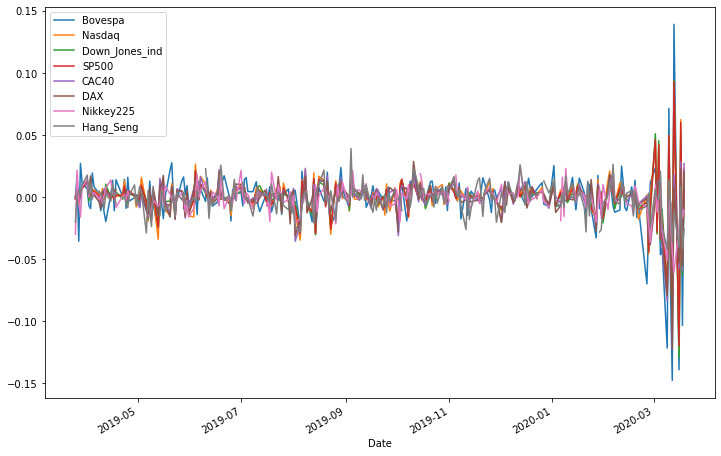

In [29]:
#daily variation
data.plot(figsize = (12,8))

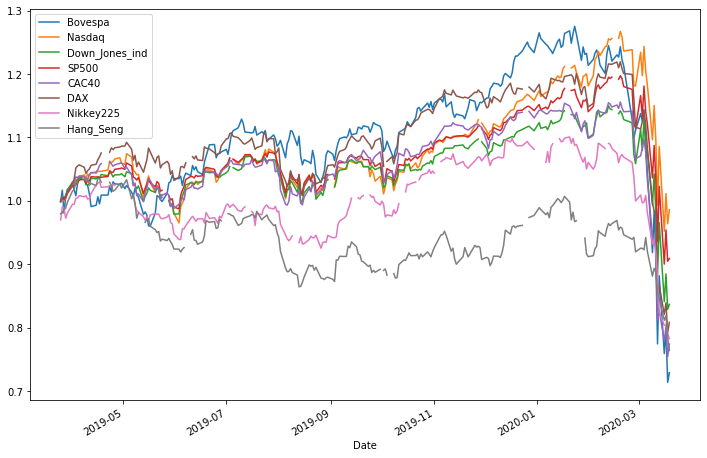

In [30]:
(data+1).cumprod().plot(figsize = (12,8))